In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import datasets
iris = datasets.load_iris()

In [2]:
df = pd.DataFrame( iris.data, columns=iris.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

def clustering( x_tmp, method, cluster_num ):
    if method == "kmeans": cluster = KMeans(n_clusters=cluster_num, random_state=0).fit(x_tmp)
    if method == "af": cluster = AffinityPropagation().fit(x_tmp)
    return cluster

In [5]:
cm = "af"
cluster = clustering( df, cm, 3 )

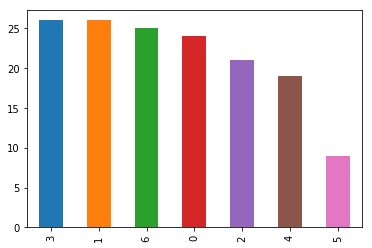

In [6]:
label_count = pd.value_counts( pd.Series(cluster.labels_) )
label_count.plot.bar()

In [10]:
def get_groups( t_cluster ):
    groups_tmp = {}
    for i, l in enumerate( t_cluster ):
        if not l in groups_tmp: groups_tmp[l] = []
        groups_tmp[l].append( i )
    return groups_tmp

groups = get_groups( cluster.labels_ )
for i in range( len( groups ) ):
    print( i, groups[i] )

0 [1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 22, 24, 25, 29, 30, 34, 35, 37, 38, 41, 42, 45, 47, 49]
1 [0, 4, 5, 10, 14, 15, 16, 17, 18, 19, 20, 21, 23, 26, 27, 28, 31, 32, 33, 36, 39, 40, 43, 44, 46, 48]
2 [50, 51, 52, 54, 56, 58, 61, 63, 65, 68, 73, 74, 75, 76, 77, 78, 85, 86, 87, 91, 97]
3 [53, 55, 57, 59, 60, 62, 64, 67, 69, 71, 79, 80, 81, 82, 84, 88, 89, 90, 92, 93, 94, 95, 96, 98, 99, 106]
4 [66, 70, 72, 83, 101, 111, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149]
5 [105, 107, 109, 117, 118, 122, 130, 131, 135]
6 [100, 102, 103, 104, 108, 110, 112, 115, 116, 120, 124, 125, 128, 129, 132, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]


In [11]:
def get_cluster_means( x_tmp, group_tmp ):
    mean_df_tmp= x_tmp.mean()
    mean_df_tmp.name = -1
    for i in range( len( group_tmp ) ):
        c = pd.DataFrame(x_tmp,index=group_tmp[i])
        c_mean = c.mean()
        c_mean.name = i 
        mean_df_tmp = pd.concat([mean_df_tmp, c_mean], axis=1)
    return mean_df_tmp

mean_df = get_cluster_means( df, groups )
mean_df.T.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
-1,5.843333,3.054000,3.758667,1.198667
0,4.725000,3.133333,1.420833,0.191667
1,5.265385,3.680769,1.503846,0.292308
2,6.404762,2.942857,4.571429,1.438095
3,5.515385,2.607692,3.930769,1.207692


In [15]:
tmp = mean_df.T.drop(-1)
ss = StandardScaler()
result = pd.DataFrame( ss.fit_transform( tmp ), columns=df.columns )
result.style.background_gradient(cmap='Oranges')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.4652,0.26527,-1.47027,-1.504
1,-0.85336,1.97986,-1.42408,-1.36839
2,0.43668,-0.33131,0.282997,0.175503
3,-0.570302,-1.38106,-0.0735221,-0.134954
4,-0.0156458,-0.94359,0.521492,0.634784
5,1.76481,0.300071,1.31913,1.09733
6,0.703024,0.110756,0.844255,1.09973


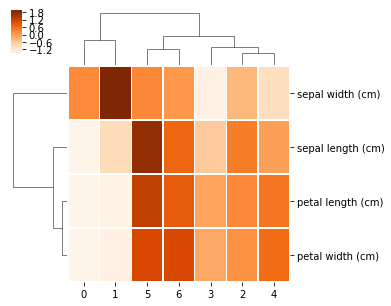

In [16]:
sns.clustermap(result.T, linewidths=.5, cmap='Oranges', figsize=(5, 5))
# sns.heatmap(mean_df, linewidths=.5, cmap='Blues')

In [17]:
dim = 2
X_r = TSNE(n_components=dim, random_state=0).fit_transform( df )

C:\Users\test\Anaconda3\lib\site-packages\matplotlib\text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


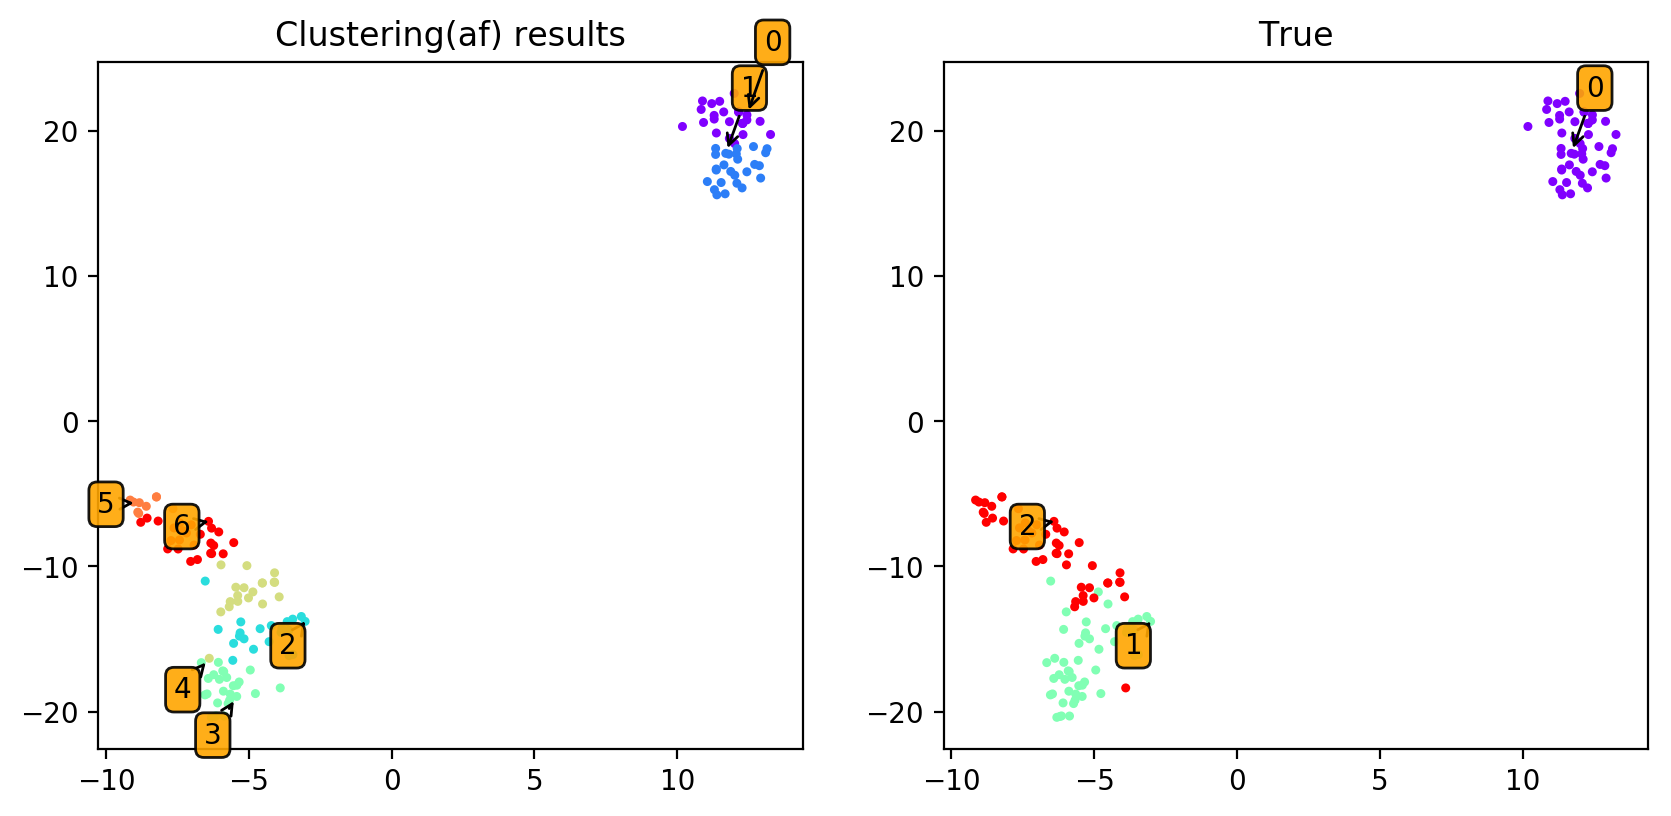

In [18]:
fig = plt.figure(figsize=(10,10),dpi=200)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1.set_title("Clustering(%s) results" % cm )
ax2.set_title("True" )
ax1.scatter(X_r[:, 0], X_r[:, 1], s=5, cmap=plt.get_cmap('rainbow'), c=cluster.labels_ )
ax2.scatter(X_r[:, 0], X_r[:, 1], s=5, cmap=plt.get_cmap('rainbow'), c=iris.target )

for c_idx, members in groups.items(): 
    ax1.annotate(c_idx, (X_r[:, 0][members[0]],X_r[:, 1][members[0]]),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='orange', alpha=0.9),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

groups_true = get_groups( iris.target )
for c_idx, members in groups_true.items(): 
    ax2.annotate(c_idx, (X_r[:, 0][members[0]],X_r[:, 1][members[0]]),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='orange', alpha=0.9),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.show()